In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
ab=pd.read_csv("abalone.csv")
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Our goal is to determine the age of the abalone using rings as target variable. The rest of the variables in the table will be inputs for our model.

In [3]:
#checking the data dimension
ab.shape

(4177, 9)

We have 4177 rows and 9 columns including the target column.

In [4]:
ab.columns 

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
# the Rings are the target variable that we have to predict.

# Column Description

In [6]:
#checking info
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#checking null values
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Observation: There is 0 NaN value

In [8]:
#checking Datatypes
ab.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

The data set contains object, float and integer Datatypes.

# Converting sex column into integer type using LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ab['Sex'] = le.fit_transform(ab['Sex'])

ab['Sex'].value_counts   # 0 for female, 1 for Infants, 2 for Male 

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

In [10]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
#Checking the null values in dataset
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

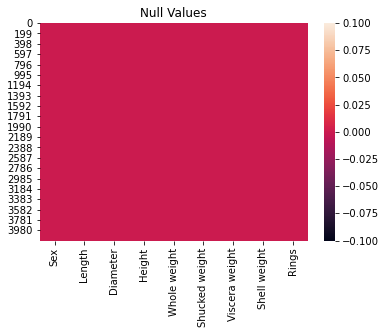

In [12]:
sns.heatmap(ab.isnull())
plt.title("Null Values")
plt.show()

In [13]:
#statistical summary
ab.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Uni-Variate Analysis

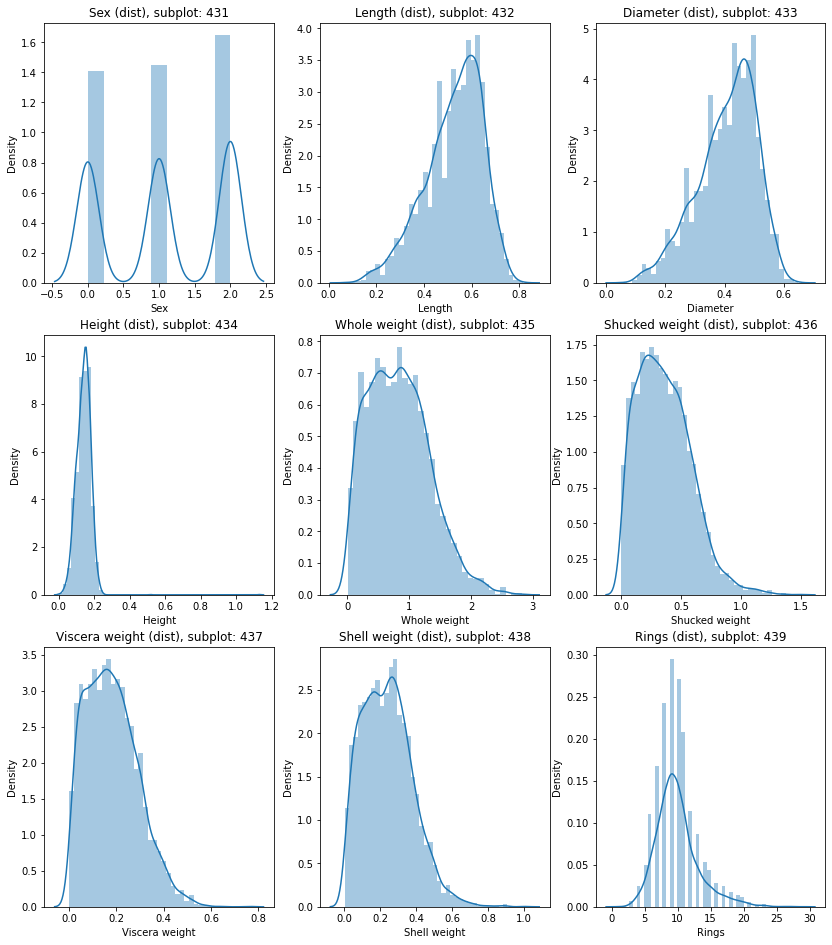

In [14]:
#Numerical Data
Columns= ab.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(ab[i])
    c = c + 1

plt.show()

Observation: In above plots we see that maximum columns are normally distributed.

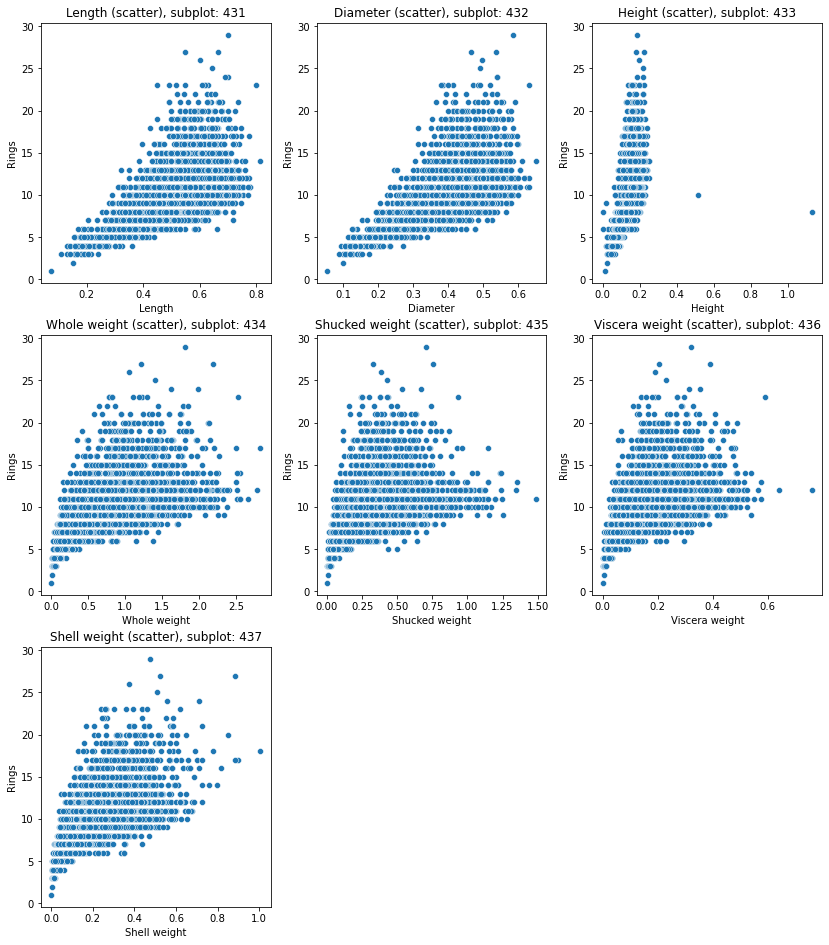

In [15]:
Columns = [ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:

    
    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = ab, x = i, y = 'Rings')
    c = c + 1

plt.show()

Observation: Here we observe that if independent column values increases the dependent(rings) value increases.

# Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

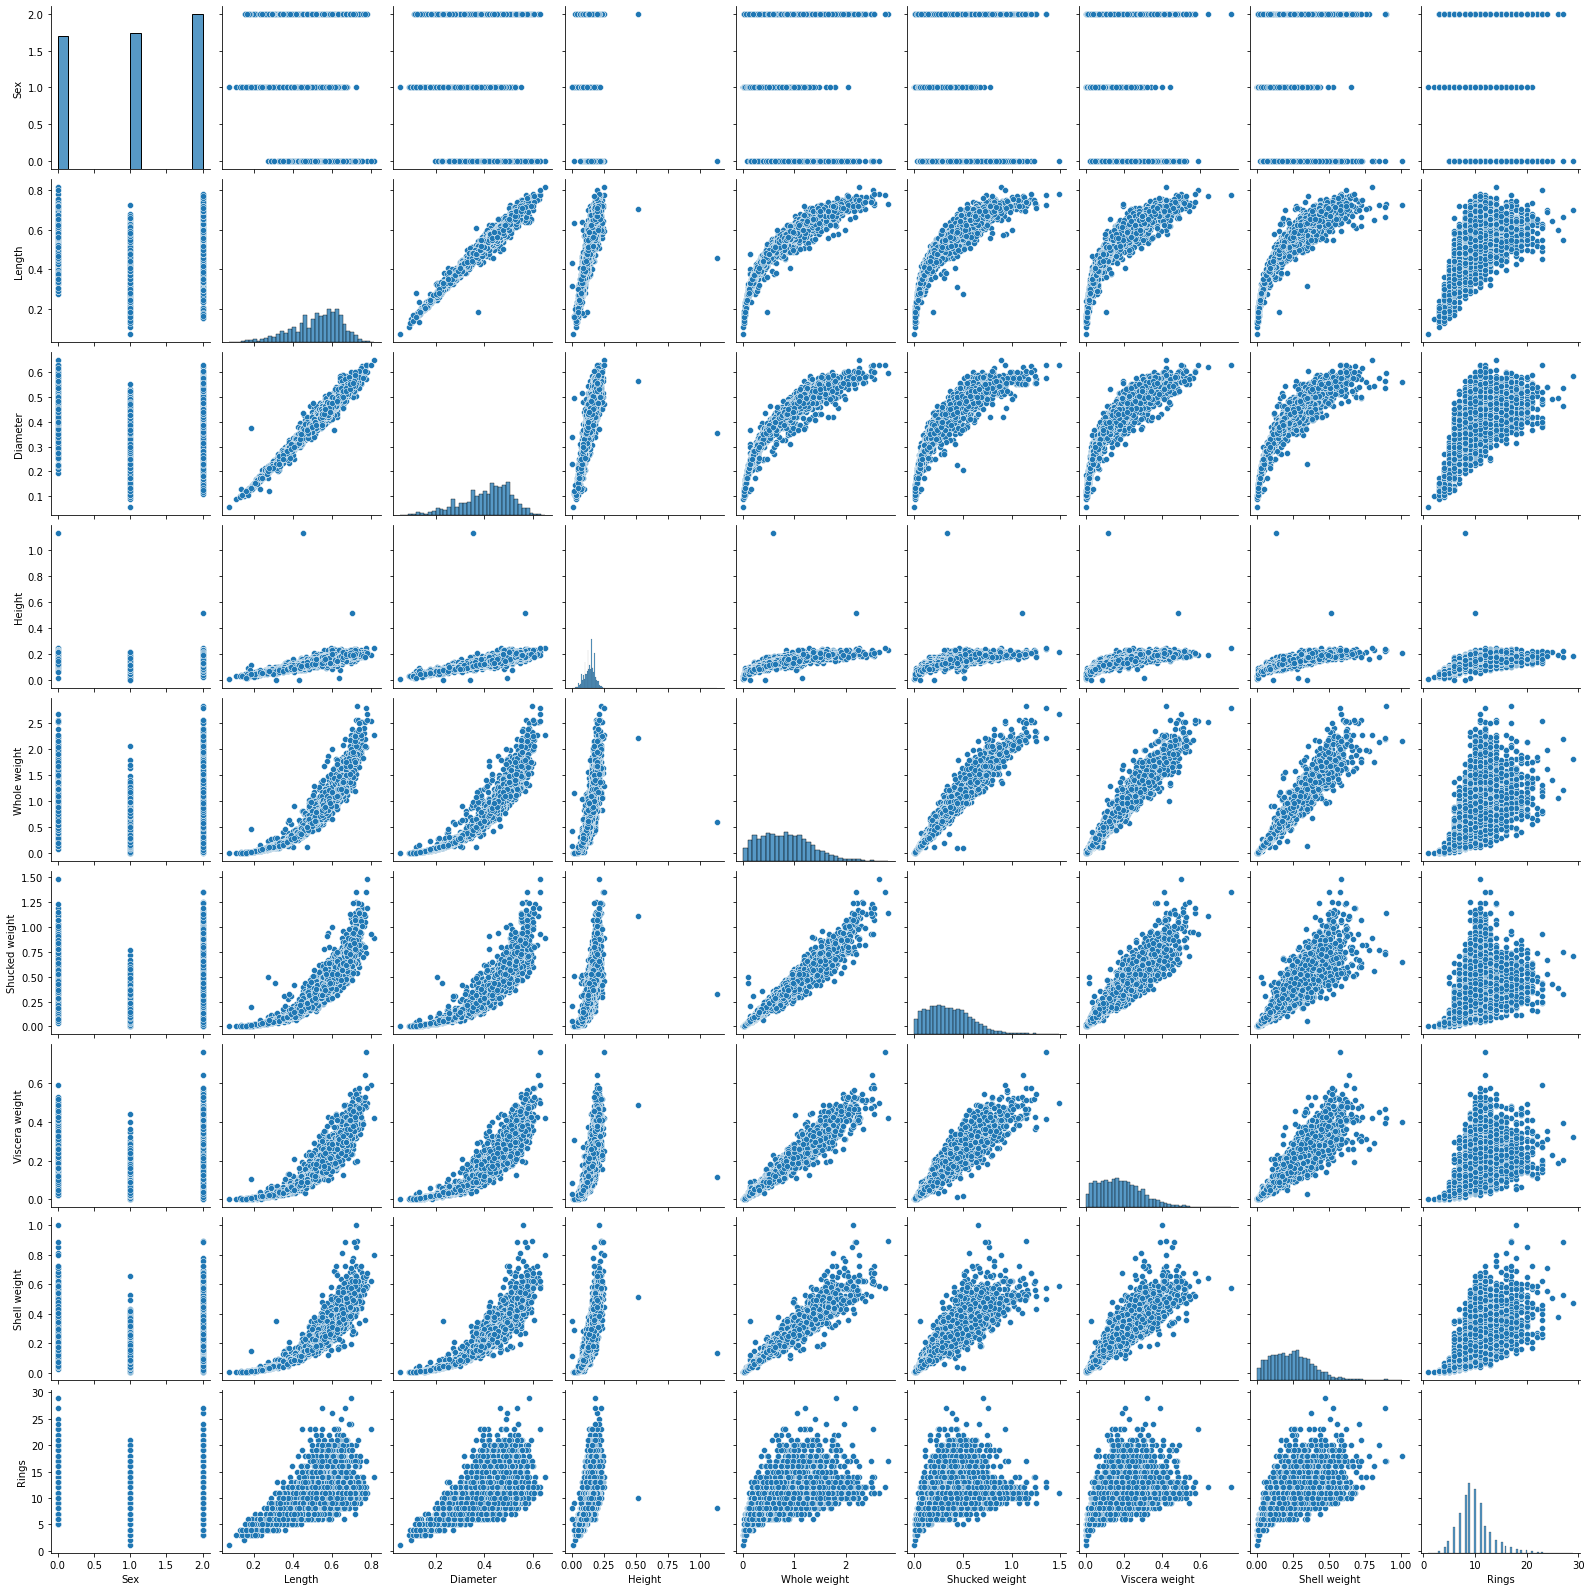

In [16]:
#Checking normal distribution of each column
sns.pairplot(ab) 
plt.show

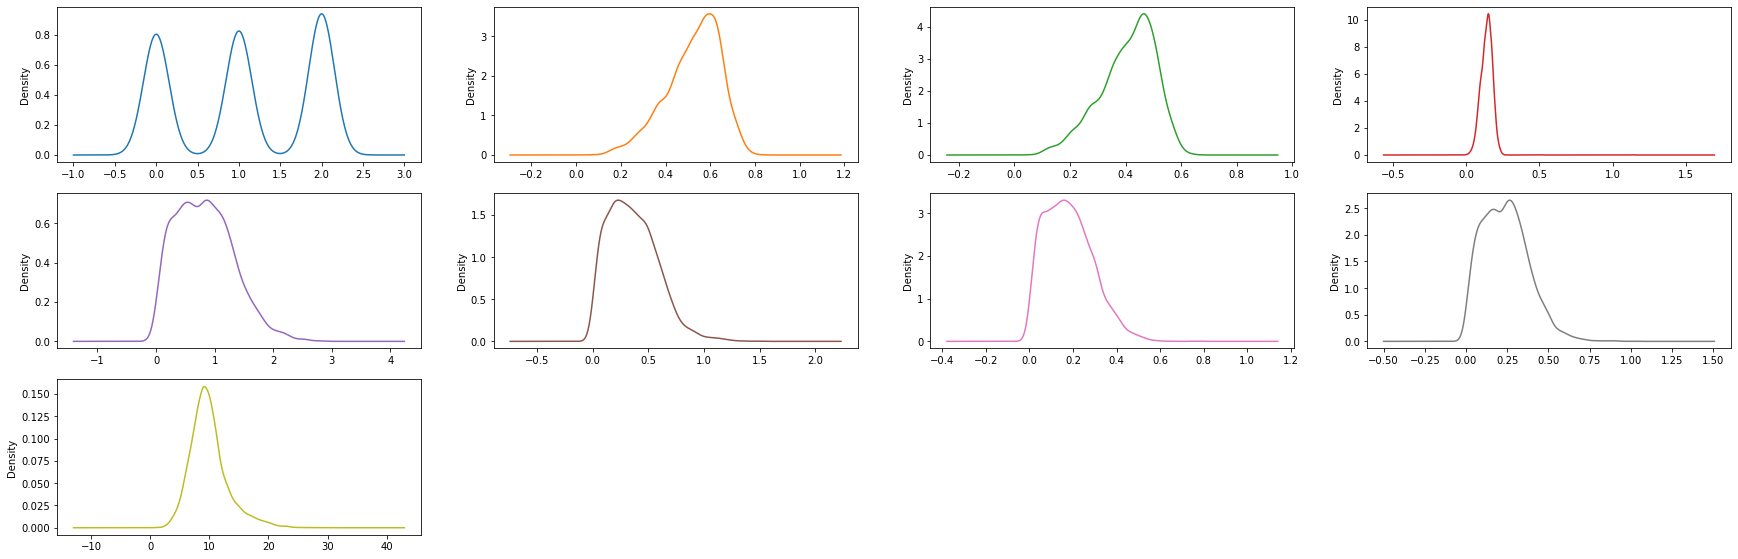

In [17]:
#Checking normal distribution of each column
ab.plot(kind='density',subplots=True, layout=(6,4), sharex=False, legend=False, figsize=[30,20])
plt.show()

In [18]:
#checking skewness
ab.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Checking correlation

In [19]:
#Correlation
ab.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


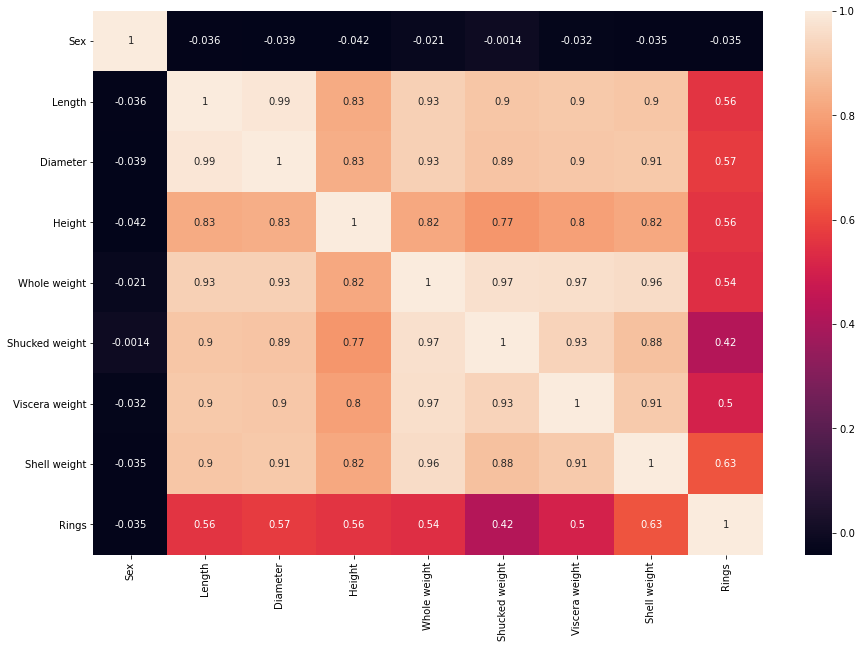

In [20]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(ab.corr(),annot=True)
plt.show()

Observation: By seeing above heat map expect sex column all columns are have good relationship with target column.

<AxesSubplot:title={'center':'Correlation with Rings'}>

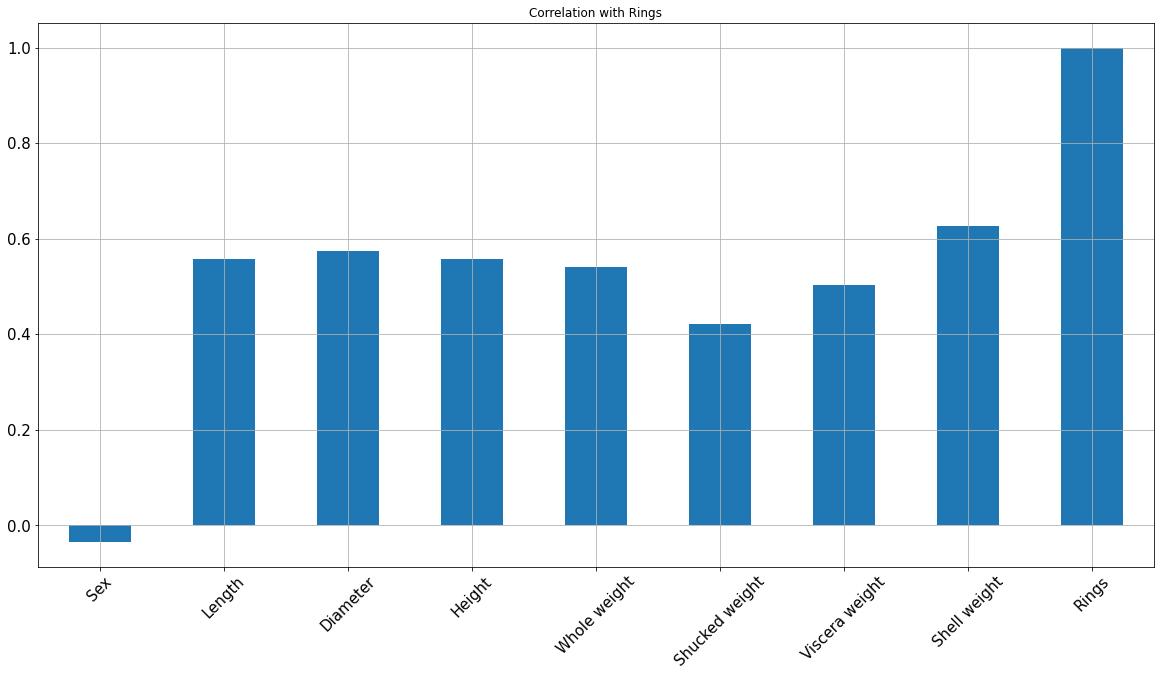

In [21]:
ab.corrwith(ab.Rings).plot.bar(figsize = (20, 10), title = "Correlation with Rings", fontsize = 15, rot = 45, grid = True)

# Checking Outliers Using Boxplot

<AxesSubplot:>

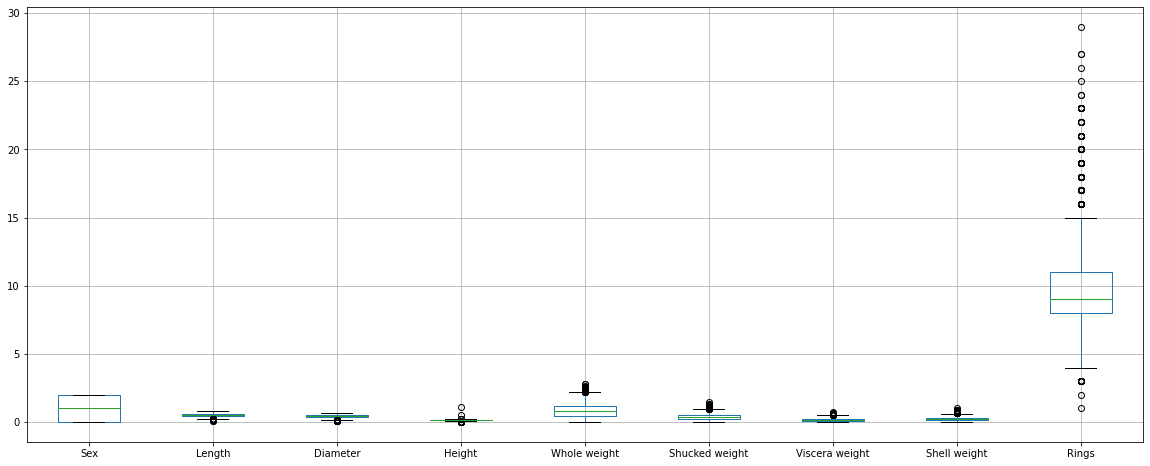

In [22]:
ab.boxplot(figsize=[20,8])

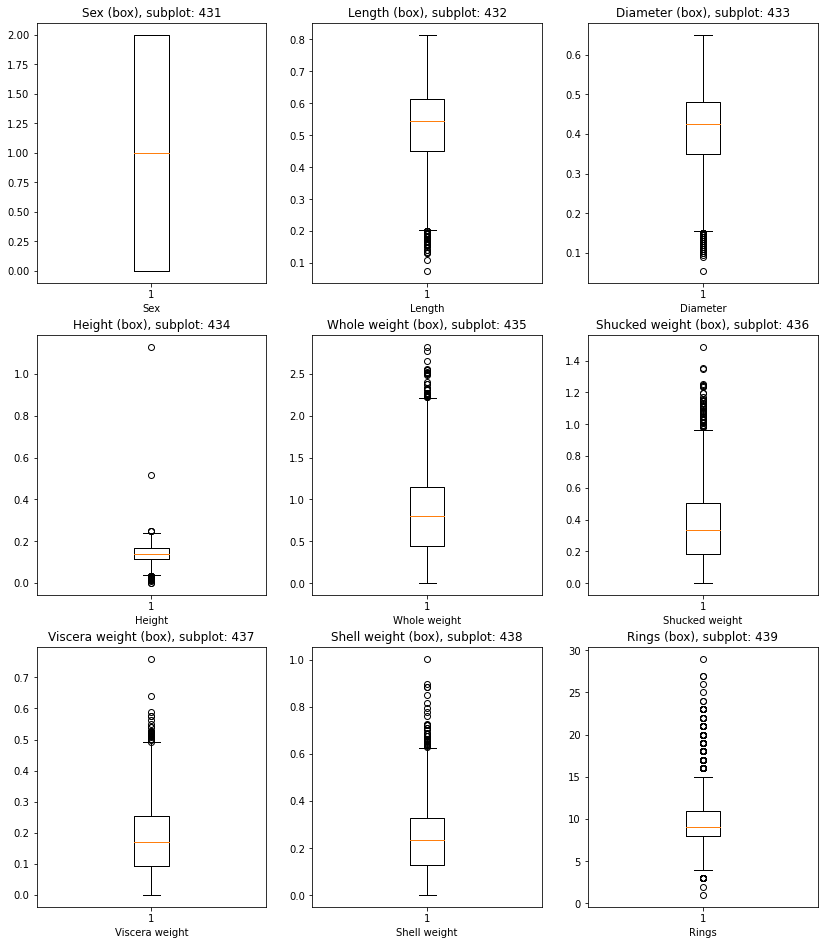

In [23]:
Columns = ab.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = ab[i])
    c = c + 1

plt.show()

In each column there are some outliers. Lets deal with outliers.

# Removing Outliers using Zscore

In [24]:
# z score technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ab))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [25]:
ab_new=ab[(z<3).all(axis=1)]
print(ab.shape)
print(ab_new.shape)

(4177, 9)
(4027, 9)


In [26]:
loss_percent=((4177-4027)/4177)*100
loss_percent

3.5910940866650707

Only 3.5% of data is removed using zscore which are outliers

# Splitting the independent and target variables in x and y

In [27]:
x=ab_new.drop("Rings",axis=1)
y=ab_new["Rings"]

In [28]:
print(x.shape)
print(y.shape)

(4027, 8)
(4027,)


In [29]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)
x

array([[1.        , 0.48739496, 0.51020408, ..., 0.21651013, 0.20426829,
        0.22307692],
       [1.        , 0.31092437, 0.30612245, ..., 0.09293129, 0.09756098,
        0.1       ],
       [0.        , 0.61344538, 0.62244898, ..., 0.24814632, 0.28658537,
        0.31538462],
       ...,
       [1.        , 0.73109244, 0.73469388, ..., 0.51408799, 0.58333333,
        0.46615385],
       [0.        , 0.77310924, 0.75510204, ..., 0.51952546, 0.52947154,
        0.44769231],
       [1.        , 0.91596639, 0.89795918, ..., 0.9293129 , 0.76422764,
        0.75384615]])

# Finding Best Random State

 - Here we find the random state which we will use to build the model.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [31]:
maxScore=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.5310646852178886 on Random_State 53


We have found best random_state value as 53. We will create our train_test_split using random_state(53)

# Creating Model
 - We will apply multiple Regression models for checking the r2_score,mean_squared_error, mean_absolute_error.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']
r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
d={'Modelling Algo':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.506243,1.484960,4.063033,2.015697
1,Lasso,-0.006836,2.184503,8.285059,2.878378
2,Ridge,0.497682,1.497187,4.133475,2.033095
3,ElasticNet,-0.006836,2.184503,8.285059,2.878378
4,SVR,0.497601,1.414725,4.134142,2.033259
5,DecisionTreeRegressor,0.168715,1.877351,6.840482,2.615431
6,KNeighborsRegressor,0.455780,1.516479,4.478284,2.116196
7,RandomForestRegressor,0.522662,1.437329,3.927924,1.981899
8,AdaBoostRegressor,0.432161,1.743060,4.672634,2.161628
9,GradientBoostingRegressor,0.524633,1.423067,3.911702,1.977802


Above model we observe that Support Vector Regressor has good R2 score.

# Checking Cross Validation Score
 - Here we check cross validation score to find the best Regression Model

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())  

In [37]:
difference={'Modelling Algo':model_names,'R2_score':r2,"Cross_val_score":cross}

In [38]:
acc_frame=pd.DataFrame(difference)
acc_frame

,Modelling Algo,R2_score,Cross_val_score
0,LinearRegression,0.506243,0.414802
1,Lasso,-0.006836,-0.173809
2,Ridge,0.497682,0.412567
3,ElasticNet,-0.006836,-0.173809
4,SVR,0.497601,0.480320
5,DecisionTreeRegressor,0.168715,-0.039182
6,KNeighborsRegressor,0.455780,0.406266
7,RandomForestRegressor,0.522662,0.456518
8,AdaBoostRegressor,0.432161,0.179102
9,GradientBoostingRegressor,0.524633,0.472591


Minimum difference in R2_score and cross validation score is for Support Vector Regressor. So Support Vector Regressor is our best model

# Hyper Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV

parameters = {'kernel' :['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' :['scale', 'auto'] }

In [40]:
svr = GridSearchCV(SVR(), parameters,cv=5) #Tuning SVR

In [41]:
svr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [42]:
svr.best_params_ #finding the best parameters for SVR hyper tuning

{'gamma': 'scale', 'kernel': 'rbf'}

In [43]:
mod=SVR(gamma= 'scale', kernel= 'rbf')
mod.fit(x_train,y_train)

pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

49.76011978921838


After Hyper tuning the R2 score is 50.

# Lets plot the final Graph for Actual and Predicted output values

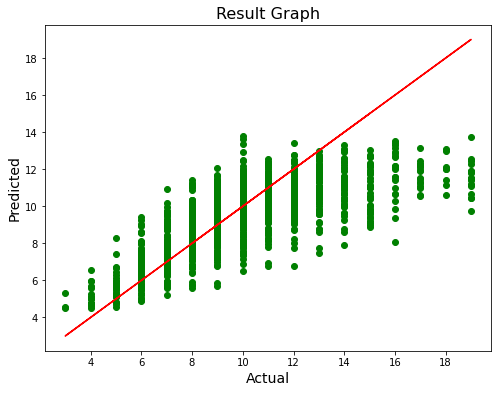

In [44]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

# Saving the Model

In [45]:
import pickle, joblib
filename = 'Abalone.pkl'
pickle.dump(svr,open(filename,'wb'))

In [46]:
SVR=joblib.load('Abalone.pkl')
Predicted = SVR.predict(x_test)
Predicted

array([ 8.08371228,  9.60943674, 11.98675176, ...,  9.98104331,
       10.96631092, 11.01752772])

In [47]:
Final=np.array(y_test)
Final

array([ 8,  9, 12, ...,  9, 14, 15], dtype=int64)

In [48]:
predict=np.array(svr.predict(x_test))
predict

array([ 8.08371228,  9.60943674, 11.98675176, ...,  9.98104331,
       10.96631092, 11.01752772])

In [49]:
ab_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
ab_pred

,original,predicted
0,8,8.083712
1,9,9.609437
2,12,11.986752
3,19,11.465669
4,7,5.202334
...,...,...
1324,12,9.703460
1325,10,11.201237
1326,9,9.981043
1327,14,10.966311


Above table is the original Rings and predicted Rings of Abalone

# Lets find the original age and predicted age of Abalone by adding 1.5 to the ab_pred table

In [50]:
ab_pred['Original_Age'] = ab_pred['original'] + 1.5
ab_pred['Predicted_Age'] = ab_pred['predicted'] + 1.5

In [51]:
ab_pred

,original,predicted,Original_Age,Predicted_Age
0,8,8.083712,9.5,9.583712
1,9,9.609437,10.5,11.109437
2,12,11.986752,13.5,13.486752
3,19,11.465669,20.5,12.965669
4,7,5.202334,8.5,6.702334
...,...,...,...,...
1324,12,9.703460,13.5,11.203460
1325,10,11.201237,11.5,12.701237
1326,9,9.981043,10.5,11.481043
1327,14,10.966311,15.5,12.466311


# Conclusion
According to our output, we saw that the original testing values are as much similar to our Support Vector Regressor Model predicted values. We have calculated the original age and predicted age by adding 1.5 to the original and predicted rings.